In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

In [1]:
clim_z500 = xr.open_dataset('/home/kit/imk-tro/gj5173/tmp/clim_Z50000_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point',engine = 'netcdf4')


NameError: name 'xr' is not defined

In [2]:
#ERA5 anomaly over the whole north America

#ERA5
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era_z500 = ds_era.fields[716,14,260:40:-1,720:1200]

NameError: name 'xr' is not defined

In [5]:
#interpolate from (220,480) to (110,240) 
original_data = ds_era_z500

# Define the original grid points along the last two dimensions
x_orig = np.arange(220)
y_orig = np.arange(480)

# Define the new grid points along the last two dimensions
y_new = np.linspace(0, 480 - 1, 240)  
x_new = np.linspace(0, 220 - 1, 110)


ds_era_z500_interpolated = original_data.interp(coords={'phony_dim_2': x_new, 'phony_dim_3': y_new}, method='linear')

In [6]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_era_z500_interpolated.values
variable2 = clim_z500.Z[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_era5 = np.empty((110, 240))
for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        batch_variable1 = variable1[i:i + batch_size, j:j + batch_size]
        batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
        batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
        anomaly_era5[i:i + batch_size, j:j + batch_size] = batch_difference

In [1]:
%store anomaly_fcn_era_z500
%store anomaly_era5_z500_0629

UsageError: Unknown variable 'anomaly_fcn_era_z500'


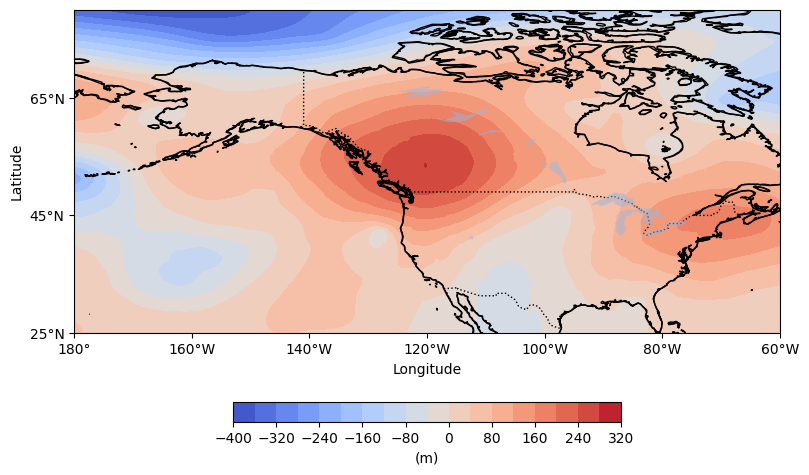

In [1]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_ec_1 = ds_ec_1['forecast'][:,56,14,:,:]




ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_ec_2 = ds_ec_2['forecast'][:,52,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_ec_3 = ds_ec_3['forecast'][:,48,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_ec_4 = ds_ec_4['forecast'][:,44,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_ec_5 = ds_ec_5['forecast'][:,40,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_ec_6 = ds_ec_6['forecast'][:,36,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_ec_7 = ds_ec_7['forecast'][:,32,14,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_ec_8 = ds_ec_8['forecast'][:,28,14,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_ec_9 = ds_ec_9['forecast'][:,24,14,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_ec_10 = ds_ec_10['forecast'][:,20,14,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_ec_11 = ds_ec_11['forecast'][:,16,14,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_ec_12 = ds_ec_12['forecast'][:,12,14,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_ec_13 = ds_ec_13['forecast'][:,8,14,:,:]
ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_ec_14 = ds_ec_14['forecast'][:,4,14,:,:]
ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_ec_15 = ds_ec_15['forecast'][:,0,14,:,:]

NameError: name 'xr' is not defined

In [8]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [9]:
ds_fc_ec_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [10]:
ds_fc_ec_z500

<xarray.DataArray 'forecast' (time: 15, phony_dim_0: 51, phony_dim_3: 220,
                              phony_dim_4: 480)>
array([[[[55334.50130742, 55346.29329586, 55346.96148256, ...,
          54260.07719931, 54261.36206581, 54267.37033857],
         [55359.34938529, 55371.43282123, 55378.87052455, ...,
          54259.52607726, 54263.44808618, 54273.99050499],
         [55380.39900933, 55395.76320306, 55396.19335209, ...,
          54263.56795076, 54268.80012152, 54268.97510663],
         ...,
         [57824.57647297, 57828.08614467, 57826.22940983, ...,
          57807.96140257, 57806.3281484 , 57808.87828841],
         [57835.98136828, 57830.99303364, 57822.97069258, ...,
          57803.28799115, 57799.35309108, 57794.6755791 ],
         [57836.23806351, 57830.9680202 , 57824.26647042, ...,
          57792.17177546, 57790.30191882, 57787.64229379]],

        [[54445.62928054, 54453.15435147, 54454.85908357, ...,
          52831.52402856, 52834.29805929, 52839.20038463],
         [54460.37318725, 54470.99505447, 54473.56654303, ...,
          52803.54701624, 52806.63976322, 52812.54467616],
         [54471.91578459, 54479.88494647, 54482.20763338, ...,
          52781.94381622, 52783.8132628 , 52781.58706726],
...
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ]],

        [[54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         ...,
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ]]]])
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    phony_dim_2  int64 14
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
    phony_dim_1  (time) int64 56 52 48 44 40 36 32 28 24 20 16 12 8 4 0
  * phony_dim_3  (phony_dim_3) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479

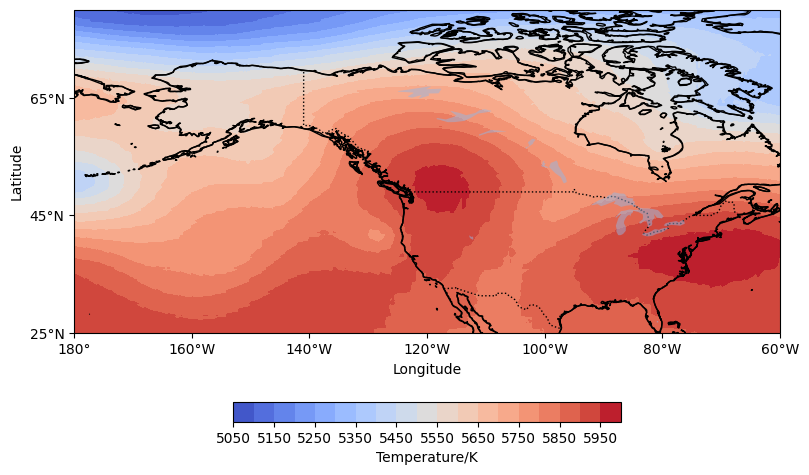

In [11]:
#ERA5 plots

#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,ds_fc_ec_z500[13,0,::-1,:]/9.80665,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)


# Set plot title and labels
#plt.title('T2m_2021-06-15-00:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()

In [32]:
original_data = ds_fc_ec_z500[:,:,:,:]

In [13]:
original_data

<xarray.DataArray 'forecast' (time: 15, phony_dim_0: 51, phony_dim_3: 220,
                              phony_dim_4: 480)>
array([[[[57836.23806351, 57830.9680202 , 57824.26647042, ...,
          57792.17177546, 57790.30191882, 57787.64229379],
         [57835.98136828, 57830.99303364, 57822.97069258, ...,
          57803.28799115, 57799.35309108, 57794.6755791 ],
         [57824.57647297, 57828.08614467, 57826.22940983, ...,
          57807.96140257, 57806.3281484 , 57808.87828841],
         ...,
         [55380.39900933, 55395.76320306, 55396.19335209, ...,
          54263.56795076, 54268.80012152, 54268.97510663],
         [55359.34938529, 55371.43282123, 55378.87052455, ...,
          54259.52607726, 54263.44808618, 54273.99050499],
         [55334.50130742, 55346.29329586, 55346.96148256, ...,
          54260.07719931, 54261.36206581, 54267.37033857]],

        [[57914.9036703 , 57910.08591906, 57902.8242324 , ...,
          57744.48592062, 57737.81758539, 57733.22782545],
         [57926.06786257, 57918.53717899, 57907.29507602, ...,
          57749.74161195, 57746.63092502, 57735.73039893],
         [57922.05013114, 57923.1769658 , 57915.96694623, ...,
          57751.63320157, 57748.78700093, 57742.95846097],
...
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ]],

        [[54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         ...,
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ],
         [54170.4140625 , 54170.4140625 , 54170.4140625 , ...,
          54170.4140625 , 54170.4140625 , 54170.4140625 ]]]])
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    phony_dim_2  int64 14
  * phony_dim_0  (phony_dim_0) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
    phony_dim_1  (time) int64 56 52 48 44 40 36 32 28 24 20 16 12 8 4 0
  * phony_dim_3  (phony_dim_3) int64 219 218 217 216 215 214 213 ... 5 4 3 2 1 0
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479

In [33]:
ds_fc_ec_z500_interpolated = np.zeros((15, 51,110,240),dtype=float)

In [34]:
for i in range(15):
    for j in range(51):
# Define the original grid points along the last two dimensions
        x_orig = np.linspace(0,219,220)
        y_orig = np.linspace(0,479,480)

# Define the new grid points along the last two dimensions
        
        y_new = np.linspace(0, 480 - 1, 240)  
        x_new = np.linspace(0, 220 - 1, 110)

        ds_fc_ec_z500_interpolated[i,j,:,:] = original_data[i,j,:,:].interp(coords={'phony_dim_4': y_new, 'phony_dim_3': x_new}, method='cubic')

In [35]:
np.shape(ds_fc_ec_z500_interpolated)

(15, 51, 110, 240)

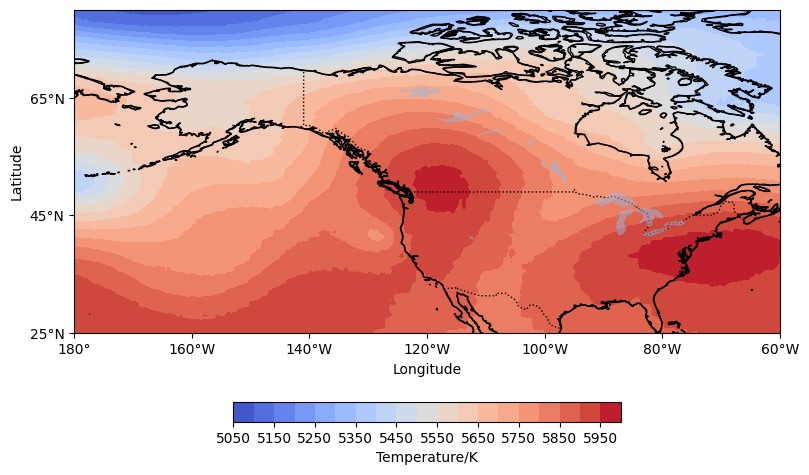

In [36]:
#ERA5 plots

#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 110)
lon = np.linspace(-180, -60, 240)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,ds_fc_ec_z500_interpolated[13,0,::-1,:]/9.80665,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)


# Set plot title and labels
#plt.title('T2m_2021-06-15-00:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()

In [37]:
ds_fc_ec_z500_interpolated  = xr.DataArray(ds_fc_ec_z500_interpolated)

In [38]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_fc_ec_z500_interpolated[:,:,::-1,:].values
variable2 = clim_z500.Z[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_fc_ec = np.empty((15,51,110,240))

for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        for k in range(15):
            for l in range(51):
                batch_variable1 = variable1[k,l,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                anomaly_fc_ec[k,l,i:i + batch_size, j:j + batch_size] = batch_difference

In [19]:
np.shape(anomaly_fc_ec)

(15, 51, 110, 240)

In [20]:
np.shape(anomaly_era5)

(110, 240)

In [21]:
y_new = np.linspace(-180, -60.5, 240)  
x_new = np.linspace(25, 79.5, 110)

In [22]:
y_new 
x_new 

array([25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. ,
       30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5,
       36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5, 41. ,
       41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. , 45.5, 46. , 46.5,
       47. , 47.5, 48. , 48.5, 49. , 49.5, 50. , 50.5, 51. , 51.5, 52. ,
       52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5, 56. , 56.5, 57. , 57.5,
       58. , 58.5, 59. , 59.5, 60. , 60.5, 61. , 61.5, 62. , 62.5, 63. ,
       63.5, 64. , 64.5, 65. , 65.5, 66. , 66.5, 67. , 67.5, 68. , 68.5,
       69. , 69.5, 70. , 70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. ,
       74.5, 75. , 75.5, 76. , 76.5, 77. , 77.5, 78. , 78.5, 79. , 79.5])

In [23]:
lon_new = np.linspace(-180, -60.5, 240) 
lat_new = np.linspace(25, 79.5, 110)

In [24]:
#lat_new

In [25]:
#lon_new

In [80]:
rightlon = -111.50
leftlon = -131.50
toplat = 60.5
bottomlat = 40.5

In [81]:
#lager box
rightlon = -95.0
leftlon = -145.0
toplat = 75.0
bottomlat = 30.0

indices_toplat = np.where(lat_new == toplat)[0]
indices_bottomlat = np.where(lat_new == bottomlat)[0]
indices_rightlon = np.where(lon_new == rightlon)[0]
indices_leftlon = np.where(lon_new == leftlon)[0]

In [82]:
indices_toplat

array([100])

In [83]:
indices_bottomlat

array([10])

In [84]:
indices_rightlon

array([170])

In [85]:
indices_leftlon

array([70])

In [86]:
np.shape(anomaly_fc_ec[:,:,31:71,97:137])
#anomaly_era5[31:71,97:137]
#lager box
np.shape(anomaly_fc_ec[:,:,10:100,70:170])
#anomaly_era5[31:71,97:137]

(15, 51, 90, 100)

In [35]:
%store anomaly_fc_ec

Stored 'anomaly_fc_ec' (ndarray)


In [39]:
anomaly_fc_ec_cf = anomaly_fc_ec[:,50,:,:]
#anomaly_era5[31:71,97:137]
#lager box
np.shape(anomaly_fc_ec_cf)


(15, 110, 240)

In [26]:
np.shape(anomaly_fc_ec[:,:,10:100,70:170])
#anomaly_era5[31:71,97:137]

(15, 51, 90, 100)

In [27]:
np.corrcoef(anomaly_era5[31:71,97:137].flatten(), anomaly_fc_ec[7,0,31:71,97:137].flatten())[0,1]

0.814895053369573

In [50]:
from scipy.stats import pearsonr
acc_fc_ec_box = np.empty((15,50))
for i in range(15):
    for j in range(50):
        acc_fc_ec_box[i,j] = np.corrcoef(anomaly_era5[31:71,97:137].flatten(), anomaly_fc_ec[i,j,31:71,97:137].flatten())[0,1]

In [51]:
#cf fc_ec
from scipy.stats import pearsonr
acc_fc_ec_cf_box = np.empty(15)
for i in range(15):
        acc_fc_ec_cf_box[i] = np.corrcoef(anomaly_era5[31:71,97:137].flatten(), anomaly_fc_ec_cf[i,31:71,97:137].flatten())[0,1]

In [52]:
#lager box
from scipy.stats import pearsonr
acc_fc_ec_box_big = np.empty((15,50))
for i in range(15):
    for j in range(50):
        acc_fc_ec_box_big[i,j] = np.corrcoef(anomaly_era5[10:100,70:170].flatten(), anomaly_fc_ec[i,j,10:100,70:170].flatten())[0,1]

In [53]:
#lager box-cf-fc_ec
from scipy.stats import pearsonr
acc_fc_ec_cf_box_big = np.empty(15)
for i in range(15):
        acc_fc_ec_cf_box_big[i] = np.corrcoef(anomaly_era5[10:100,70:170].flatten(), anomaly_fc_ec_cf[i,10:100,70:170].flatten())[0,1]

In [54]:
#whole picture
from scipy.stats import pearsonr
acc_fc_ec_box_whole = np.empty((15,50))
for i in range(15):
    for j in range(50):
        acc_fc_ec_box_whole[i,j] = np.corrcoef(anomaly_era5.flatten(), anomaly_fc_ec[i,j,:,:].flatten())[0,1]

In [55]:
#whole picture-cf-fc-ec
from scipy.stats import pearsonr
acc_fc_ec_cf_box_whole = np.empty(15)
for i in range(15):
        acc_fc_ec_cf_box_whole[i] = np.corrcoef(anomaly_era5.flatten(), anomaly_fc_ec_cf[i,:].flatten())[0,1]

In [94]:
np.shape(acc_fc_ec_box_whole)

(15, 50)

In [61]:
%store acc_fc_ec_cf_box
%store acc_fc_ec_cf_box_big
%store acc_fc_ec_cf_box_whole

Stored 'acc_fc_ec_cf_box' (ndarray)
Stored 'acc_fc_ec_cf_box_big' (ndarray)
Stored 'acc_fc_ec_cf_box_whole' (ndarray)


In [62]:
%store acc_fc_ec_box
%store acc_fc_ec_box_big
%store acc_fc_ec_box_whole

Stored 'acc_fc_ec_box' (ndarray)
Stored 'acc_fc_ec_box_big' (ndarray)
Stored 'acc_fc_ec_box_whole' (ndarray)


([<matplotlib.axis.XTick at 0x14e1efb1d0a0>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

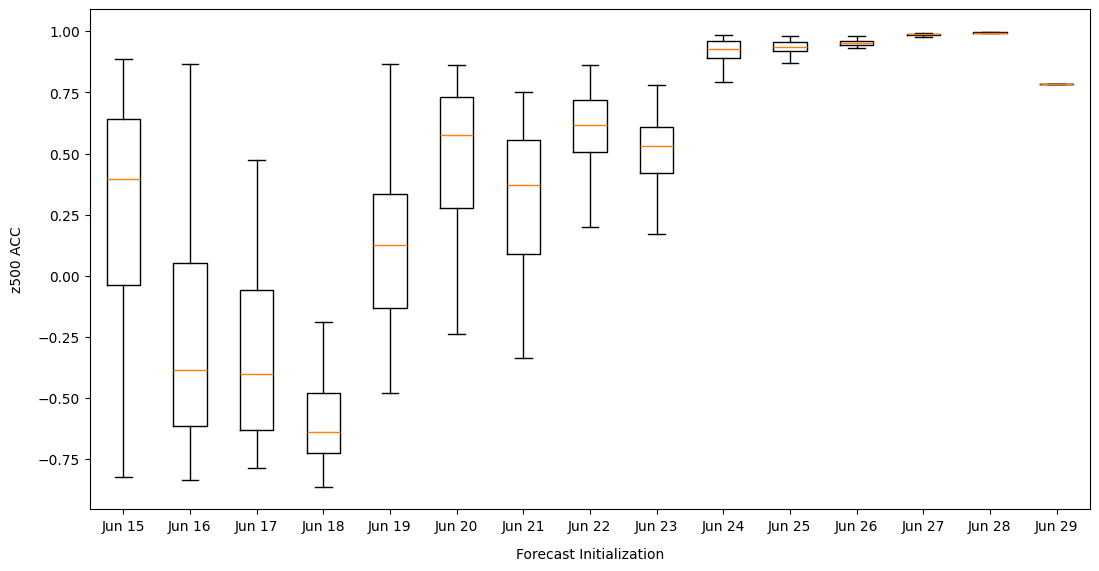

In [58]:
#ACC boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
#data = acc_fc_ec_box.T
ax.boxplot(acc_fc_ec_box.T,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

([<matplotlib.axis.XTick at 0x14e1ef1d0460>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

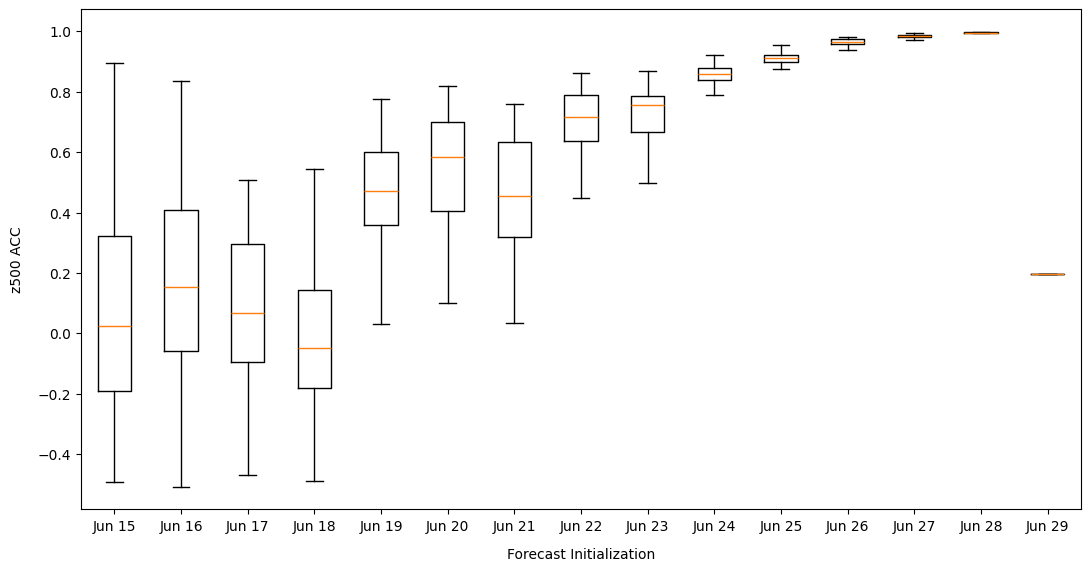

In [63]:
#ACC boxplot-bigger box
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=acc_fc_ec_box_big.T
ax.boxplot(data,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

([<matplotlib.axis.XTick at 0x14e1ef344190>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

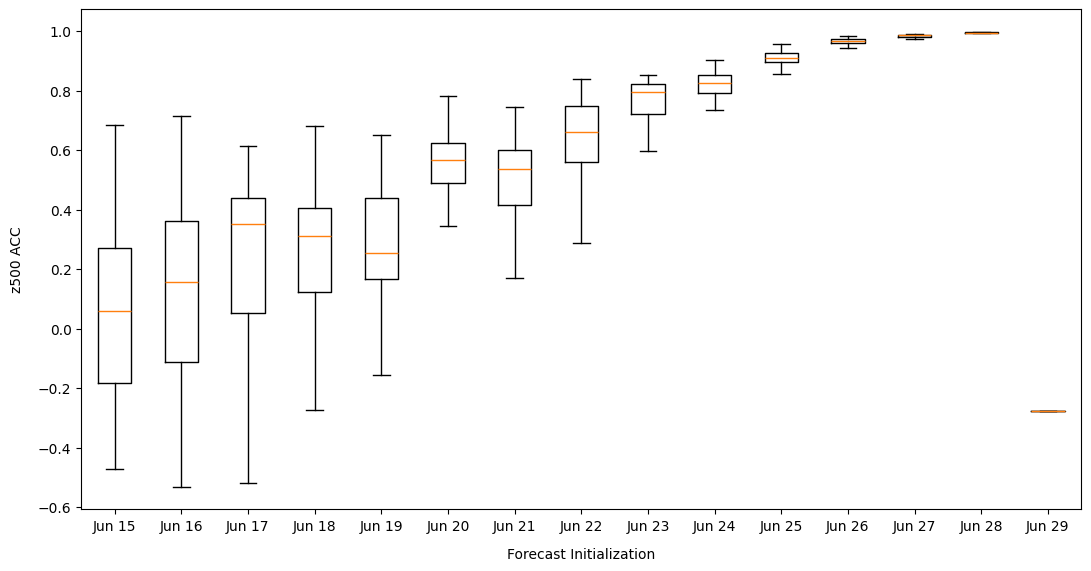

In [60]:
#ACC boxplot-bigger box
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=acc_fc_ec_box_whole.T
ax.boxplot(data,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [64]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
fcn_era_z = ds_fcn_era.forecast[:,:,:,14,:,:]

In [65]:
variable_data_ec_1 = fcn_era_z[1,:,56,:,:]


variable_data_ec_2 = fcn_era_z[2,:,52,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


variable_data_ec_3 = fcn_era_z[3,:,48,:,:]

variable_data_ec_4 = fcn_era_z[4,:,44,:,:]

variable_data_ec_5 = fcn_era_z[5,:,40,:,:]

variable_data_ec_6 = fcn_era_z[6,:,36,:,:]

variable_data_ec_7 = fcn_era_z[7,:,32,:,:]

variable_data_ec_8 = fcn_era_z[8,:,28,:,:]

variable_data_ec_9 = fcn_era_z[9,:,24,:,:]

variable_data_ec_10 = fcn_era_z[10,:,20,:,:]

variable_data_ec_11 = fcn_era_z[12,:,16,:,:]

variable_data_ec_12 = fcn_era_z[13,:,12,:,:]

variable_data_ec_13 = fcn_era_z[14,:,8,:,:]

variable_data_ec_14 = fcn_era_z[15,:,4,:,:]

variable_data_ec_15 = fcn_era_z[16,:,0,:,:]

In [66]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [67]:
ds_fc_era_z500 = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [68]:
ds_fc_era_z500

<xarray.DataArray 'forecast' (time: 15, phony_dim_1: 51, phony_dim_4: 220,
                              phony_dim_5: 480)>
array([[[[54047.38881083, 54037.34800618, 54019.75564352, ...,
          52775.20751417, 52789.63595946, 52805.68033404],
         [54131.09650808, 54119.98543411, 54112.54902183, ...,
          52783.78640411, 52790.84726571, 52808.24995171],
         [54214.11621097, 54199.4450476 , 54189.49651202, ...,
          52782.31881269, 52800.40752285, 52803.01517324],
         ...,
         [57732.30683905, 57728.73811924, 57723.01988442, ...,
          57797.63495527, 57795.24760761, 57791.68421854],
         [57729.06862461, 57725.75577992, 57716.9067654 , ...,
          57803.7648866 , 57798.2996565 , 57791.62024976],
         [57719.76157722, 57716.35072909, 57710.47585276, ...,
          57802.77583085, 57805.34196305, 57797.33356391]],

        [[54825.73438337, 54823.46923248, 54821.98769914, ...,
          54540.80329184, 54528.99820722, 54462.57749604],
         [54829.45554159, 54843.18909526, 54872.77347694, ...,
          54555.53343603, 54504.2756322 , 54493.69333541],
         [54860.74314329, 54883.60142307, 54865.41957888, ...,
          54526.33109866, 54514.28802764, 54504.92175275],
...
         [58200.65220902, 58197.39472194, 58194.1405153 , ...,
          58031.37113535, 58031.37113535, 58034.62903249],
         [58190.88671872, 58187.62882158, 58184.375025  , ...,
          58028.11733877, 58031.37113535, 58031.37113535],
         [58184.375025  , 58181.11712785, 58181.11712785, ...,
          58028.11733877, 58028.11733877, 58028.11733877]],

        [[51338.32428075, 51322.04689169, 51309.02739978, ...,
          52191.23047635, 52191.23047635, 52191.23047635],
         [51335.07027914, 51322.04689169, 51305.76950264, ...,
          52220.53125286, 52220.53125286, 52220.53125286],
         [51338.32428075, 51322.04689169, 51309.02739978, ...,
          52249.82813383, 52249.82813383, 52249.82813383],
         ...,
         [58200.65220902, 58197.39472194, 58194.1405153 , ...,
          58031.37113535, 58031.37113535, 58034.62903249],
         [58190.88671872, 58187.62882158, 58184.375025  , ...,
          58028.11733877, 58031.37113535, 58031.37113535],
         [58184.375025  , 58181.11712785, 58181.11712785, ...,
          58028.11733877, 58028.11733877, 58028.11733877]]]])
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    phony_dim_3  int64 14
    phony_dim_0  (time) int64 1 2 3 4 5 6 7 8 9 10 12 13 14 15 16
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
    phony_dim_2  (time) int64 56 52 48 44 40 36 32 28 24 20 16 12 8 4 0
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479

In [69]:
original_data = ds_fc_era_z500[:,:,:,:]
original_data

<xarray.DataArray 'forecast' (time: 15, phony_dim_1: 51, phony_dim_4: 220,
                              phony_dim_5: 480)>
array([[[[54047.38881083, 54037.34800618, 54019.75564352, ...,
          52775.20751417, 52789.63595946, 52805.68033404],
         [54131.09650808, 54119.98543411, 54112.54902183, ...,
          52783.78640411, 52790.84726571, 52808.24995171],
         [54214.11621097, 54199.4450476 , 54189.49651202, ...,
          52782.31881269, 52800.40752285, 52803.01517324],
         ...,
         [57732.30683905, 57728.73811924, 57723.01988442, ...,
          57797.63495527, 57795.24760761, 57791.68421854],
         [57729.06862461, 57725.75577992, 57716.9067654 , ...,
          57803.7648866 , 57798.2996565 , 57791.62024976],
         [57719.76157722, 57716.35072909, 57710.47585276, ...,
          57802.77583085, 57805.34196305, 57797.33356391]],

        [[54825.73438337, 54823.46923248, 54821.98769914, ...,
          54540.80329184, 54528.99820722, 54462.57749604],
         [54829.45554159, 54843.18909526, 54872.77347694, ...,
          54555.53343603, 54504.2756322 , 54493.69333541],
         [54860.74314329, 54883.60142307, 54865.41957888, ...,
          54526.33109866, 54514.28802764, 54504.92175275],
...
         [58200.65220902, 58197.39472194, 58194.1405153 , ...,
          58031.37113535, 58031.37113535, 58034.62903249],
         [58190.88671872, 58187.62882158, 58184.375025  , ...,
          58028.11733877, 58031.37113535, 58031.37113535],
         [58184.375025  , 58181.11712785, 58181.11712785, ...,
          58028.11733877, 58028.11733877, 58028.11733877]],

        [[51338.32428075, 51322.04689169, 51309.02739978, ...,
          52191.23047635, 52191.23047635, 52191.23047635],
         [51335.07027914, 51322.04689169, 51305.76950264, ...,
          52220.53125286, 52220.53125286, 52220.53125286],
         [51338.32428075, 51322.04689169, 51309.02739978, ...,
          52249.82813383, 52249.82813383, 52249.82813383],
         ...,
         [58200.65220902, 58197.39472194, 58194.1405153 , ...,
          58031.37113535, 58031.37113535, 58034.62903249],
         [58190.88671872, 58187.62882158, 58184.375025  , ...,
          58028.11733877, 58031.37113535, 58031.37113535],
         [58184.375025  , 58181.11712785, 58181.11712785, ...,
          58028.11733877, 58028.11733877, 58028.11733877]]]])
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
    phony_dim_3  int64 14
    phony_dim_0  (time) int64 1 2 3 4 5 6 7 8 9 10 12 13 14 15 16
  * phony_dim_1  (phony_dim_1) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49 50
    phony_dim_2  (time) int64 56 52 48 44 40 36 32 28 24 20 16 12 8 4 0
  * phony_dim_4  (phony_dim_4) int64 0 1 2 3 4 5 6 ... 214 215 216 217 218 219
  * phony_dim_5  (phony_dim_5) int64 0 1 2 3 4 5 6 ... 474 475 476 477 478 479

In [70]:
ds_fc_era_z500_interpolated = np.zeros((15, 51,110,240),dtype=float)

In [71]:
for i in range(15):
    for j in range(50):
# Define the original grid points along the last two dimensions
        x_orig = np.linspace(0,219,220)
        y_orig = np.linspace(-0,479,480)

# Define the new grid points along the last two dimensions
        y_new = np.linspace(0, 480 - 1, 240)  
        x_new = np.linspace(0, 220 - 1, 110)

        ds_fc_era_z500_interpolated[i,j,:,:] = original_data[i,j,:,:].interp(coords={'phony_dim_5': y_new, 'phony_dim_4': x_new}, method='cubic')

In [72]:
ds_fc_era_z500_interpolated  = xr.DataArray(ds_fc_era_z500_interpolated)

In [74]:
#use smaller batches to calculate the difference(cuz direct calculation is not possible)
variable1 = ds_fc_era_z500_interpolated[:,:,::-1,:].values
variable2 = clim_z500.Z[:,:].values


batch_size = 50  # Set the desired batch size

# Process data in smaller batches using a loop

anomaly_fc_era = np.empty((15,51,110,240))

for i in range(0, 110, batch_size):
    for j in range(0, 240, batch_size):
        for k in range(15):
            for l in range(51):
                batch_variable1 = variable1[k,l,i:i + batch_size, j:j + batch_size]
                batch_variable2 = variable2[i:i + batch_size, j:j + batch_size]
        
        # Calculate the difference point by point for the current batch
                batch_difference = batch_variable1 - batch_variable2
        
        # Update the difference array with the current batch_difference
                anomaly_fc_era[k,l,i:i + batch_size, j:j + batch_size] = batch_difference

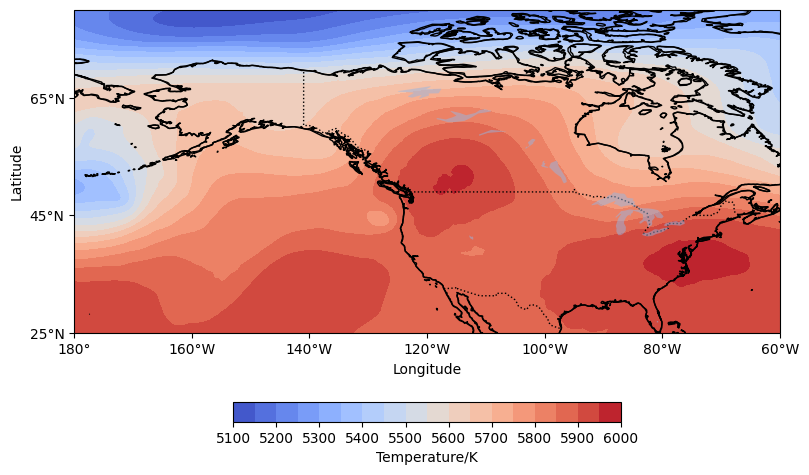

In [75]:
#check the anomaly of 06.29
#lat = ds_clim_79_20['latitude']
#lon = ds_clim_79_20['longitude']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


#ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,ds_fc_era_z500[14,7,::-1,:]/9.80665,cmap='coolwarm',levels=20)
#mark the location of lytton
#red_point_lon = -121.50
#red_point_lat = 50.25
#ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal',shrink=0.5)


# Set plot title and labels
#plt.title('T2m_2021-06-15-00:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
plt.show()

In [76]:
np.shape(anomaly_fc_era)

(15, 51, 110, 240)

In [77]:
from scipy.stats import pearsonr
acc_fc_era_box = np.empty((15,51))
for i in range(15):
    for j in range(51):
        acc_fc_era_box[i,j] = np.corrcoef(anomaly_era5[31:71,97:137].flatten(), anomaly_fc_era[i,j,31:71,97:137].flatten())[0,1]

In [78]:
#bigger box-10:100,70:170
from scipy.stats import pearsonr
acc_fc_era_box_big = np.empty((15,51))
for i in range(15):
    for j in range(51):
        acc_fc_era_box_big[i,j] = np.corrcoef(anomaly_era5[10:100,70:170].flatten(), anomaly_fc_era[i,j,10:100,70:170].flatten())[0,1]

In [79]:
#whole box
from scipy.stats import pearsonr
acc_fc_era_box_whole = np.empty((15,51))
for i in range(15):
    for j in range(51):
        acc_fc_era_box_whole[i,j] = np.corrcoef(anomaly_era5[:,:].flatten(), anomaly_fc_era[i,j,:,:].flatten())[0,1]

In [80]:
%store acc_fc_era_box_big
%store acc_fc_era_box_whole
%store acc_fc_era_box

Stored 'acc_fc_era_box_big' (ndarray)
Stored 'acc_fc_era_box_whole' (ndarray)
Stored 'acc_fc_era_box' (ndarray)


([<matplotlib.axis.XTick at 0x14e1ef108040>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

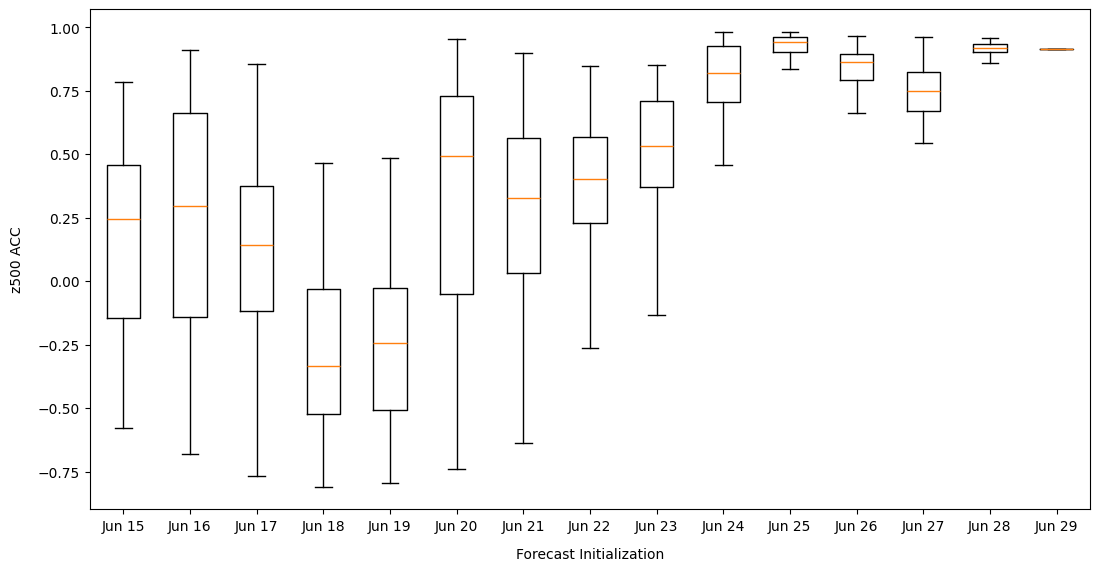

In [81]:
#ACC boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data_1 = acc_fc_era_box.T
ax.boxplot(data_1,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

([<matplotlib.axis.XTick at 0x14e1f12ed910>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

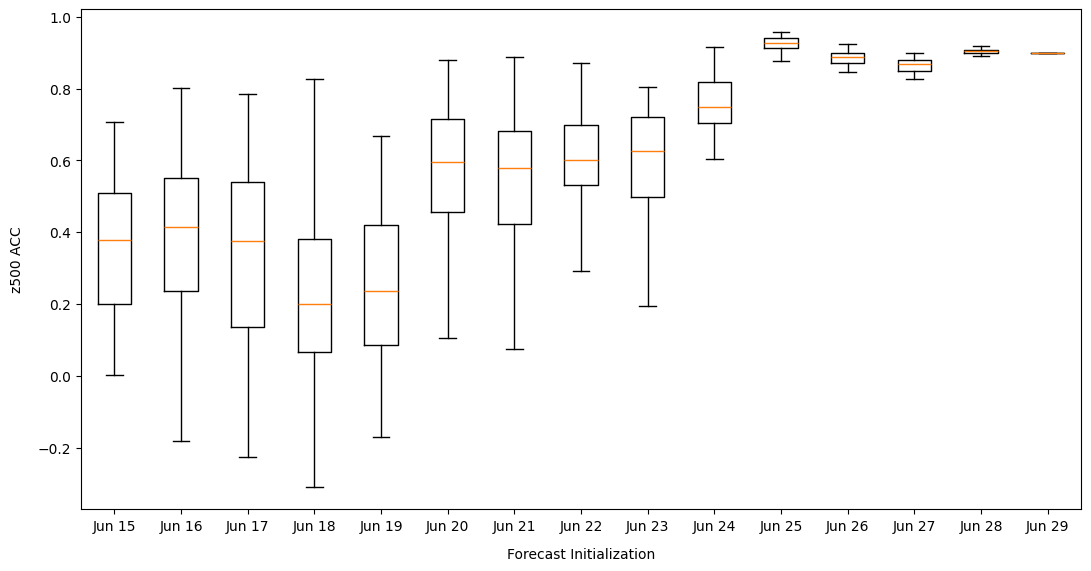

In [82]:

#ACC boxplot-bigger
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data_1 = acc_fc_era_box_big.T
ax.boxplot(data_1,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

([<matplotlib.axis.XTick at 0x14e1ef5f18b0>,
 [Text(1, 0, 'Jun 15'),
  Text(2, 0, 'Jun 16'),
  Text(3, 0, 'Jun 17'),
  Text(4, 0, 'Jun 18'),
  Text(5, 0, 'Jun 19'),
  Text(6, 0, 'Jun 20'),
  Text(7, 0, 'Jun 21'),
  Text(8, 0, 'Jun 22'),
  Text(9, 0, 'Jun 23'),
  Text(10, 0, 'Jun 24'),
  Text(11, 0, 'Jun 25'),
  Text(12, 0, 'Jun 26'),
  Text(13, 0, 'Jun 27'),
  Text(14, 0, 'Jun 28'),
  Text(15, 0, 'Jun 29')])

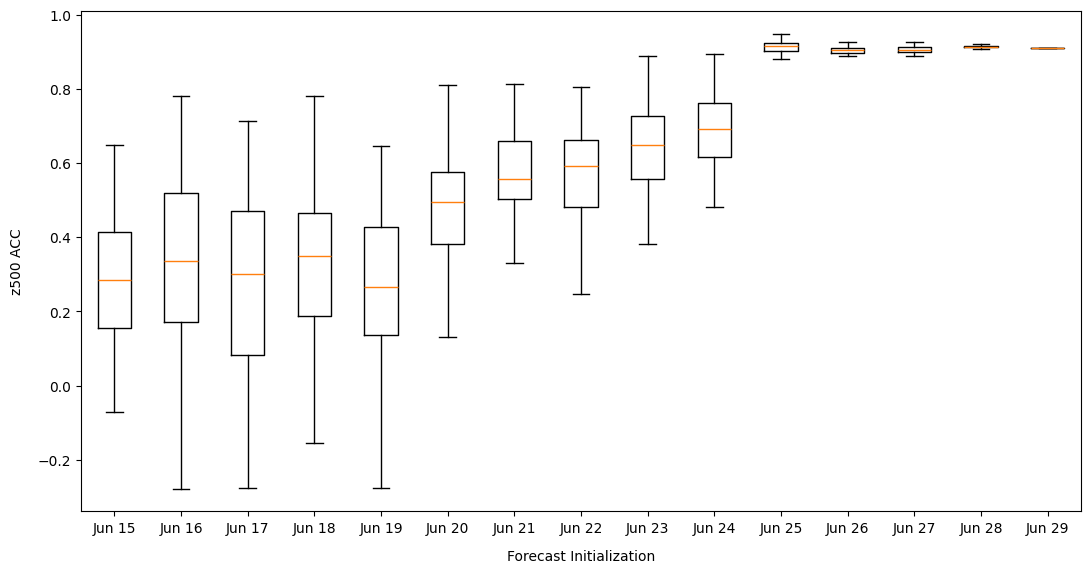

In [83]:
#ACC boxplot-whole
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("z500 ACC", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data_1 = acc_fc_era_box_whole.T
ax.boxplot(data_1,showfliers = False)
#ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [84]:
%store -r acc_ec_box
%store -r acc_ec_box_big

In [85]:
%store  acc_fc_ec_box
%store  acc_fc_ec_box_big
%store  acc_fc_era_box
%store  acc_fc_era_box_big
%store  anomaly_fc_era
%store  anomaly_fc_ec
%store  anomaly_era5

Stored 'acc_fc_ec_box' (ndarray)
Stored 'acc_fc_ec_box_big' (ndarray)
Stored 'acc_fc_era_box' (ndarray)
Stored 'acc_fc_era_box_big' (ndarray)
Stored 'anomaly_fc_era' (ndarray)
Stored 'anomaly_fc_ec' (ndarray)
Stored 'anomaly_era5' (ndarray)


In [86]:
%store -r acc_fc_era_box_whole
%store -r acc_fc_ec_box_whole
%store -r acc_ec_box_whole

-1.0
0.0
1.0


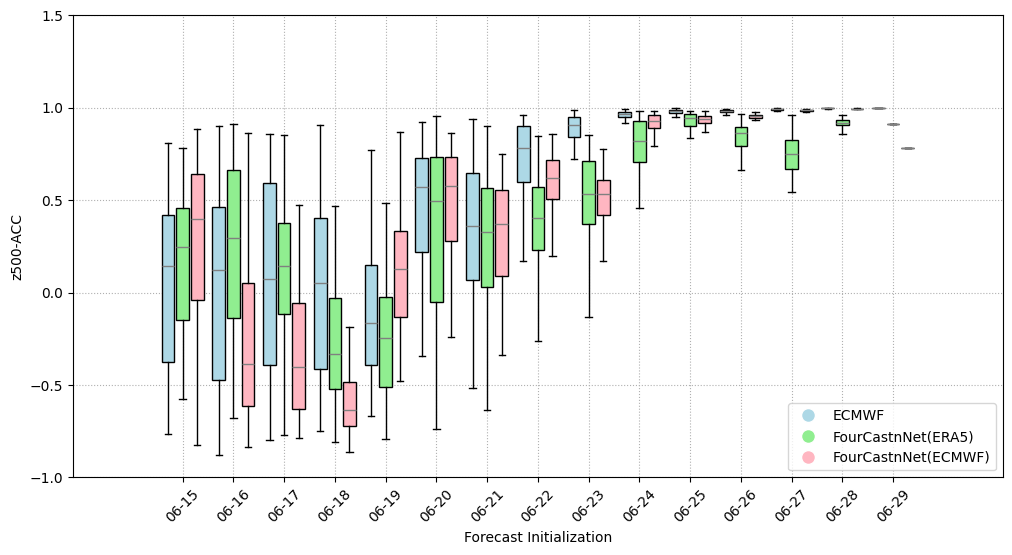

In [87]:

import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box.T,acc_fc_era_box.T,acc_fc_ec_box.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]#+ line_artists 
plt.legend(handles=legend_handles, loc='lower right')
#plt.title('whole area')
#plt.savefig('/home/kit/imk-tro/gj5173/21.09_boxplot/850_ts_ensemble_3togther.png', bbox_inches='tight',dpi=100)

pl.show()

-1.0
0.0
1.0


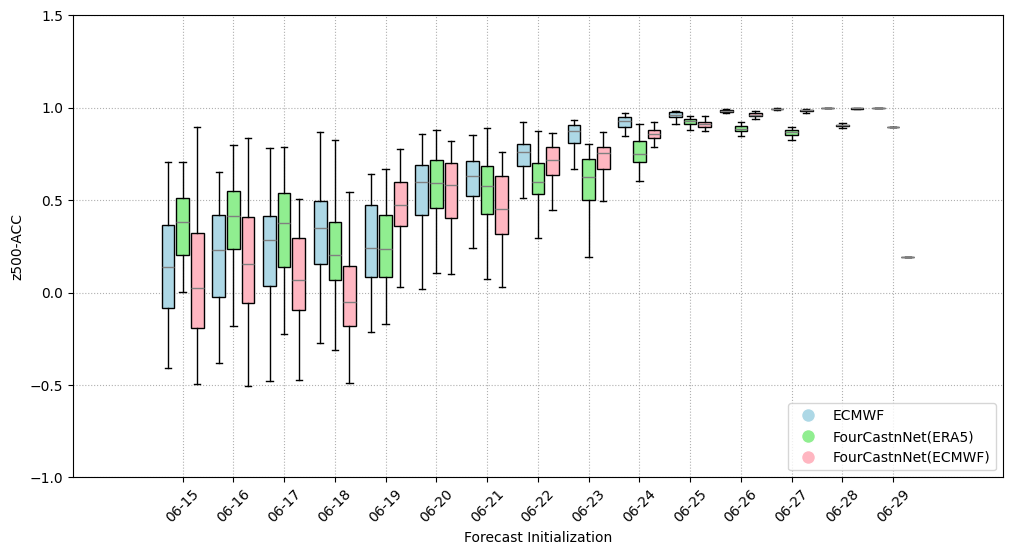

In [88]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_big.T,acc_fc_era_box_big.T,acc_fc_ec_box_big.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]#+ line_artists 
plt.legend(handles=legend_handles, loc='lower right')
#plt.title('whole area')
#plt.savefig('/home/kit/imk-tro/gj5173/21.09_boxplot/850_ts_ensemble_3togther.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:
%store -r acc_ec_box_whole
%store -r acc_fc_era_box_whole
%store -r acc_fc_ec_box_whole

In [5]:
%store -r acc_ec_box_big
%store -r acc_fc_era_box_big
%store -r acc_fc_ec_box_big

-1.0
0.0
1.0


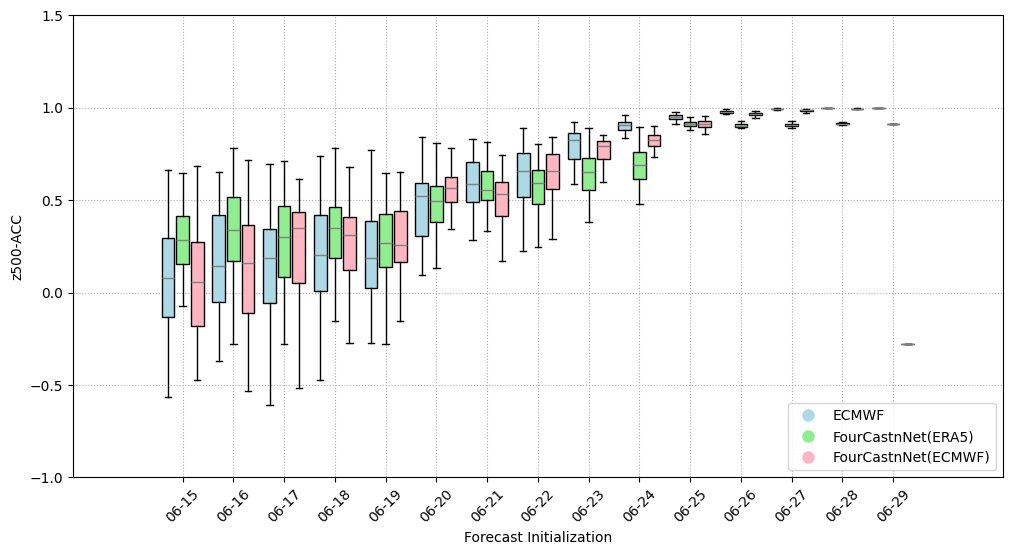

In [4]:
import matplotlib.pyplot as pl
#%store -r data_array_fc_ec_values_850hpa
colors = [ 'lightblue','lightgreen','lightpink']
plt.figure(figsize=(12, 6))

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [acc_ec_box_whole.T,acc_fc_era_box_whole.T,acc_fc_ec_box_whole.T]
#np.shape(data_groups)


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(acc_ec_box_whole[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(-1,1.5)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('z500-ACC')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=False
                )
%store -r mean_era5_06_29
#line_artists = []
#line = plt.axhline(y=ds_era_z500_mean/9.80665, color='r', linestyle='-',label = 'ERA5')
#line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )


legend_labels = ['ECMWF','FourCastnNet(ERA5)','FourCastnNet(ECMWF)']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:], colors) ]#+ line_artists 
plt.legend(handles=legend_handles, loc='lower right')
#plt.title('whole area')
#plt.savefig('/home/kit/imk-tro/gj5173/21.09_boxplot/850_ts_ensemble_3togther.png', bbox_inches='tight',dpi=100)

pl.show()